# INFO 4602: Project 2 
***

**Name**: Hathaway Zhang

**Group**: 4
***

This python notebook cleaned the raw data and output the cleaned data into csv for further visualizations. An interaction plot is also included based on the major and years. 

In [115]:
import pandas as pd
import numpy as np
import csv
import string

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

from ipywidgets import widgets, interactive

%matplotlib inline

***
Data Input and Clean
***

In [134]:
dfDirtyyy = pd.read_csv("https://raw.githubusercontent.com/INFO-4602-5602/project-2-ncwit-team-4/master/NCWIT_DataV2_RawData.csv",low_memory=False)

In [135]:
string.replace(dfDirtyyy, 'CS and/or Eng Multiple Majors (data submitted in aggregation)', 'Computer Science + X')
string.replace(dfDirtyyy, 'Computer and Information Science', 'Computer Science + X')
string.replace(dfDirtyyy, 'Mathematics and Computer Science', 'Computer Science + X')
string.replace(dfDirtyyy, 'Computer Software and Media Applications', 'Computer Science + X')
string.replace(dfDirtyyy, 'Mathematics and Computer Science', 'Computer Science + X')
string.replace(dfDirtyyy, 'Computer Science &', 'Computer Science + X')
string.replace(dfDirtyyy, 'Computer Science +', 'Computer Science + X')
string.replace(dfDirtyyy, 'Electrical & Computer Engineering', 'Computer Science + X')
string.replace(dfDirtyyy, 'Electrical and Computer Engineering', 'Computer Science + X')
string.replace(dfDirtyyy, 'Electrical, Electronics and Communications Engineering', 'Computer Science + X')
string.replace(dfDirtyyy, 'Programming', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Engineering', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Engineering Technology', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Science (BS)', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Science (BA)', 'Computer Science')
string.replace(dfDirtyyy, 'Applied Computer Science', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Science / Engineering', 'Computer Science')
string.replace(dfDirtyyy, 'Computer Support', 'Computer Support Specialist')
string.replace(dfDirtyyy, 'Information Technology', 'Information Science')
string.replace(dfDirtyyy, 'Informatics', 'Information Science')
string.replace(dfDirtyyy, 'Information', 'Information Science')
string.replace(dfDirtyyy, 'Applied Information Technology', 'Information Science')
string.replace(dfDirtyyy, 'Information Sciences', 'Information Science')
string.replace(dfDirtyyy, 'Computer Information Systems', 'Information Science')
string.replace(dfDirtyyy, 'Computer and Information Systems', 'Information Science')
string.replace(dfDirtyyy, 'Web Design/Graphicsg', 'Web Design')
string.replace(dfDirtyyy, 'Telecomm Technology', 'Information Technology Management')
string.replace(dfDirtyyy, 'Security', 'Cybersecurity')
string.replace(dfDirtyyy, 'Network Security', 'Cybersecurity')
string.replace(dfDirtyyy, 'Information Assurance/Cybersecurity', 'Cybersecurity')
string.replace(dfDirtyyy, 'Applied Engineering Sciences', 'General Engineering')
string.replace(dfDirtyyy, 'Computer Systems Engineering', 'Systems Engineering')
string.replace(dfDirtyyy, 'Computer Engineering Technology', 'Engineering Technology')
string.replace(dfDirtyyy, 'Computational Mathematics', 'Mathematics')

string.replace(dfDirtyyy, '2003-2004', '2003')
string.replace(dfDirtyyy, '2004-2005', '2004')
string.replace(dfDirtyyy, '2005-2006', '2005')
string.replace(dfDirtyyy, '2006-2007', '2006')
string.replace(dfDirtyyy, '2007-2008', '2007')
string.replace(dfDirtyyy, '2008-2009', '2008')
string.replace(dfDirtyyy, '2009-2010', '2009')
string.replace(dfDirtyyy, '2010-2011', '2010')
string.replace(dfDirtyyy, '2011-2012', '2011')
string.replace(dfDirtyyy, '2012-2013', '2012')
string.replace(dfDirtyyy, '2013-2014', '2013')
string.replace(dfDirtyyy, '2014-2015', '2014')
string.replace(dfDirtyyy, '2015-2016', '2015')
string.replace(dfDirtyyy, '2016-2017', '2016')

In [118]:
dfR = dfDirtyyy[['Major Program Name','School Year',
                 'Enroll, Female: Native Hawaiian/Other Pacific Islander (Enrl F)',
                 'Enroll, Female: White (Enrl F)',
                 'Enroll, Female: Black/African American (Enrl F)',
                 'Enroll, Female: Hispanics of any race (Enrl F)',
                 'Enroll, Female: American Indian/Alaska Native (Enrl F)']]
dfR.to_csv('race.csv', sep=',')

In [119]:
dfDirtyy = dfDirtyyy.drop(dfDirtyyy[dfDirtyyy['Enroll, Female: Avg. SAT Math Score (Enrl F)'] > 800].index)
dfDirty = dfDirtyy.dropna(subset=['Major Program Name','School Year',
                                  'Enroll, Female: Avg. ACT Math Score (Enrl F)',
                                  'Enroll, Female: Avg. SAT Math Score (Enrl F)']).copy()
dfDirty['School Year'] = dfDirty['School Year'].astype(str).astype(int)
dfClean_SAT = dfDirty[['Major Program Name','School Year',
                                  'Enroll, Female: Avg. SAT Math Score (Enrl F)']]
dfClean_ACT = dfDirty[['Major Program Name','School Year',
                                  'Enroll, Female: Avg. ACT Math Score (Enrl F)']]

In [75]:
dfClean_SAT.to_csv('sat.csv', sep=',')
dfClean_ACT.to_csv('act.csv', sep=',')

In [76]:
dfScore = dfDirty[['Major Program Name','School Year',
                    'Enroll, Female: Avg. ACT Math Score (Enrl F)',
                    'Enroll, Female: Avg. SAT Math Score (Enrl F)']]
dfScore = dfScore.rename(columns={'Enroll, Female: Avg. ACT Math Score (Enrl F)': 'ACT Math Score', 
                                  'Enroll, Female: Avg. SAT Math Score (Enrl F)': 'SAT Math Score'})
dfScore.head()
#dfScore.to_csv('score.csv', sep=',')

,Major Program Name,School Year,ACT Math Score,SAT Math Score
73,Computer Science + X,2014,29.58,666.67
86,Computer Science + X,2016,34.00,752.00
90,Computer Science + X,2010,21.00,565.00
91,Computer Science + X,2011,19.00,380.00
92,Computer Science + X,2012,20.00,450.00


In [77]:
dfScore = dfScore.sort_values(by=['School Year'])
dfdouble = dfScore.groupby(['School Year','Major Program Name']).mean()

In [78]:
dfScore = dfScore.sort_values(by=['School Year'])
dfdouble = dfScore[dfScore['Major Program Name'] == 'Computer Science + X'].groupby('School Year').mean()
dfcs = dfScore[dfScore['Major Program Name'] == 'Computer Science'].groupby('School Year').mean()
dfinfo = dfScore[dfScore['Major Program Name'] == 'Information Science'].groupby('School Year').mean()
dfge = dfScore[dfScore['Major Program Name'] == 'General Engineering'].groupby('School Year').mean()
dfae = dfScore[dfScore['Major Program Name'] == 'Aerospace Engineering'].groupby('School Year').mean()
dfce = dfScore[dfScore['Major Program Name'] == 'Chemical Engineering'].groupby('School Year').mean()
dfee = dfScore[dfScore['Major Program Name'] == 'Electrical Engineering'].groupby('School Year').mean()
dfse = dfScore[dfScore['Major Program Name'] == 'Software Engineering'].groupby('School Year').mean()
dfse = dfScore[dfScore['Major Program Name'] == 'Mechanical Engineering'].groupby('School Year').mean()

In [79]:
dfScore['School Year'].reset_index(drop=True)
dfScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1782 to 2592
Data columns (total 4 columns):
Major Program Name    203 non-null object
School Year           203 non-null int64
ACT Math Score        203 non-null float64
SAT Math Score        203 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


***
Interaction Plot
***

In [80]:
# This function adds annotates to each bar
def label(rects):
    for rect in rects:
                y_value = rect.get_height()
                x_value = rect.get_x() + rect.get_width() / 2
                space = 2
                va = 'bottom'
                plt.annotate('{:.1f}'.format(y_value),(x_value, y_value),xytext=(0, space),
                            textcoords="offset points",ha='center',
                            va=va, fontsize = 13)

In [81]:
start_year = widgets.BoundedFloatText(
    value=dfScore['School Year'].min(),
    min=dfScore['School Year'].min(),
    max=dfScore['School Year'].max(),
    step=1,
    description='Start Year:',
    disabled=False,
    color='black'
)
end_year = widgets.BoundedFloatText(
    value=dfScore['School Year'].max(),
    min=dfScore['School Year'].min(),
    max=dfScore['School Year'].max(),
    step=1,
    description='End Year:',
    disabled=False,
    color='black'
)

# Make a dropdown to select the Area, or "All"
area = widgets.Dropdown(
    options=['All'] + list(dfScore['Major Program Name'].unique()),
    value='All',
    description='Major:')

In [86]:
def plotit(area, start_year, end_year):
    
    if start_year > end_year:
        print("You must select a start year that is prior to end year")
    else:
        df2 = dfScore.copy()
        if area != 'All':
            df2 = df2[df2['Major Program Name'] == area]

        # Filter between min and max years (inclusive)
        df2 = df2[(df2['School Year'] >= start_year) & (df2['School Year'] <= end_year)]

        # Plot
        if len(df2) > 0:
            graph = df2.groupby(['School Year']).mean().unstack()
            pic = graph.plot(kind='bar',stacked=False,fontsize=16,figsize=(19,12))
            plt.xticks(rotation=85)
            plt.title("Major is {}".format(area),fontsize=16)
            plt.ylabel('Scores', rotation=-0, fontsize=16)
            
            rects = pic.patches
            label(rects)
                       
            plt.minorticks_on()
            plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.5)
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black', alpha=0.65)
            plt.show();
            
        else:
            print("No data to show for current selection")

In [87]:
interactive(plotit, area=area, start_year=start_year, end_year=end_year)

A Jupyter Widget

***
Pie Graph based on race and year
***

In [127]:
dfdouble.to_csv('score.csv', sep=',')

In [131]:
dfDirtyyy['Enroll, Female: Native Hawaiian/Other Pacific Islander (Enrl F)'].fillna(0)
dfDirtyyy['Enroll, Female: White (Enrl F)'].fillna(0)
dfDirtyyy['Enroll, Female: Black/African American (Enrl F)'].fillna(0)
dfDirtyyy['Enroll, Female: Hispanics of any race (Enrl F)'].fillna(0)
dfDirtyyy['Enroll, Female: American Indian/Alaska Native (Enrl F)'].fillna(0)
dfDirtyyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Columns: 269 entries, Record# to Race/Ethnicity Unknown (Tot. M)
dtypes: float64(262), object(7)
memory usage: 8.0+ MB


In [129]:
dfRace = dfDirtyyy[['Major Program Name','School Year',
                  'Enroll, Female: Asian (Enrl F)',
                  'Enroll, Female: Native Hawaiian/Other Pacific Islander (Enrl F)',
                  'Enroll, Female: White (Enrl F)',
                  'Enroll, Female: Black/African American (Enrl F)',
                  'Enroll, Female: Hispanics of any race (Enrl F)',
                  'Enroll, Female: American Indian/Alaska Native (Enrl F)']]
df = dfRace.groupby(['School Year'], as_index=False).sum()
df.drop(df.index[:1], inplace=True)
df = df.rename(columns={'Enroll, Female: Asian (Enrl F)': 'Asian', 
                        'Enroll, Female: Native Hawaiian/Other Pacific Islander (Enrl F)': 'Native Hawaiian/Other Pacific Islander',
                        'Enroll, Female: White (Enrl F)': 'White',
                        'Enroll, Female: Black/African American (Enrl F)': 'African American',
                        'Enroll, Female: Hispanics of any race (Enrl F)': 'Hispanics',
                        'Enroll, Female: American Indian/Alaska Native (Enrl F)': 'American Indian/Alaska Native'})
df.to_csv('race.csv', sep=',')
df = df.groupby(['School Year']).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2003 to 2016
Data columns (total 6 columns):
Asian                                     14 non-null float64
Native Hawaiian/Other Pacific Islander    14 non-null float64
White                                     14 non-null float64
African American                          14 non-null float64
Hispanics                                 14 non-null float64
American Indian/Alaska Native             14 non-null float64
dtypes: float64(6)
memory usage: 784.0+ bytes


In [122]:
df.reset_index(drop=True)

,Asian,Native Hawaiian/Other Pacific Islander,White,African American,Hispanics,American Indian/Alaska Native
0,64.0,0.0,54.0,14.0,195.0,1.0
1,49.0,0.0,65.0,32.0,170.0,3.0
2,53.0,0.0,82.0,26.0,198.0,6.0
3,63.0,0.0,100.0,56.0,245.0,1.0
4,70.0,0.0,105.0,54.0,237.0,3.0
5,154.0,3.0,238.0,55.0,245.0,5.0
6,195.0,0.0,384.0,88.0,342.0,12.0
7,240.0,8.0,523.0,103.0,414.0,7.0
8,322.0,5.0,653.0,149.0,442.0,7.0
9,405.0,8.0,681.0,137.0,546.0,4.0


In [103]:
# This function outputs pie chart based on the years and race
def autoplot(num):
    labels = 'Asian', 'Native Hawaiian', 'White', 'African American', 'Hispanics', 'American Indian/Alaska Native'
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink', 'red']
    explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
    sizes = df.iloc[num].values.tolist()
    A = 2002
    B = A + num
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Percentage of each race in %i" %B)
    plt.axis('equal')

This pie graph tells the percentage of each race on each year. The percentage is calculated based on all the majors. 

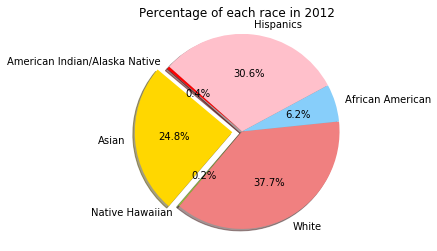

In [184]:
autoplot(10)